In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import MulticoreTSNE
import fitsne
import LargeVis
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, SpectralEmbedding, MDS

%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

### Pull the data from the internet

Pen Digits is a traditional clustering data set consisting of a set of 8x8 greyscale images of handwritten digits.  We will do the traditional thing with this data a treat the greyscale images as a 64 long vector and compute Euclidean distance between these vectors. 

In [2]:
%%time
from sklearn.datasets import load_digits
digits = load_digits()

CPU times: user 172 ms, sys: 14.1 ms, total: 186 ms
Wall time: 200 ms


Each image is flattened into a single 784 long greyscale vector.  

In [3]:
data = digits.data
labels = digits.target
data.shape

(1797, 64)

### Now let's use UMAP to embed these points into a two dimensional space.

In [4]:
fit = umap.UMAP(n_neighbors=15, random_state=42, metric='euclidean')
%time u = fit.fit_transform(data)

/Users/leland/anaconda3/envs/umap_dev/lib/python3.5/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


CPU times: user 9.01 s, sys: 293 ms, total: 9.31 s
Wall time: 9.32 s


In [5]:
output = pd.DataFrame(u, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_pendigits_umap1.csv')

In [6]:
pd.DataFrame(u, columns=('x','y')).to_csv('embedding_pendigits_umap.csv')

Text(0.5,1,'Pen Digits data embedded into two dimensions by UMAP')

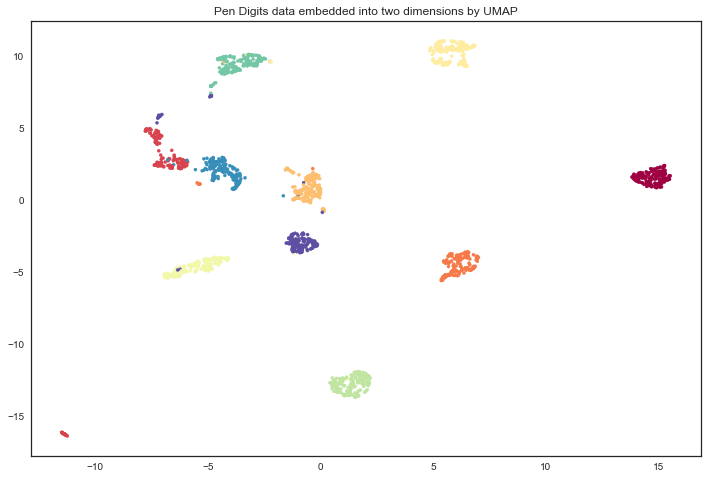

In [7]:
plt.scatter(u[:,0], u[:,1], c=labels, cmap="Spectral", s=10)
plt.title('Pen Digits data embedded into two dimensions by UMAP')

### T-SNE

In [8]:
fit_tsne = MulticoreTSNE.MulticoreTSNE(n_jobs=1, random_state=42)
%time u_tsne = fit_tsne.fit_transform(data)

CPU times: user 14.6 s, sys: 116 ms, total: 14.7 s
Wall time: 17.2 s


In [9]:
output = pd.DataFrame(u_tsne, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_pendigits_tsne1.csv')

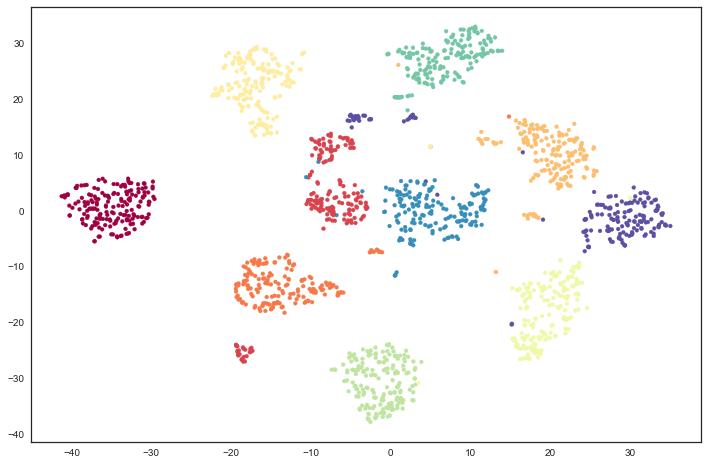

In [10]:
plt.scatter(u_tsne[:,0], u_tsne[:,1], c=labels, cmap="Spectral", s=15)

### PCA

The old standby of PCA which is blindingly fast to compute and often used as an initialization to many of the more complex algorithms.  This isn't really a competitor but instead should be thought of as a strawman.  Given that other algorithms initialize with these values one would hope that they can do better.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
%time u_pca = pca.fit_transform(data)

CPU times: user 26.6 ms, sys: 3.16 ms, total: 29.8 ms
Wall time: 22.8 ms


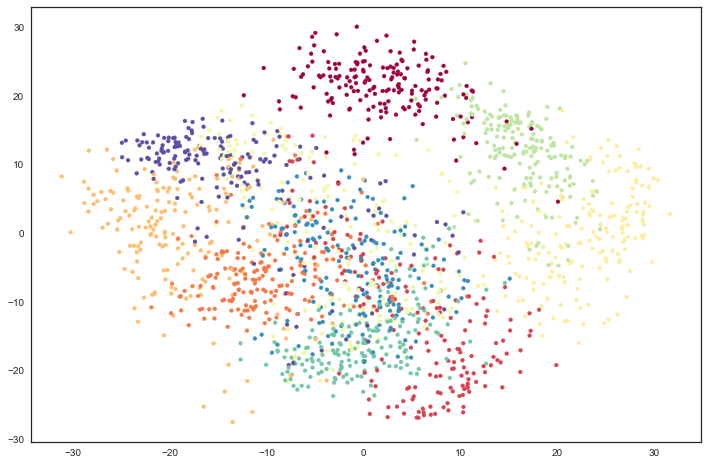

In [12]:
plt.scatter(u_pca[:,0], u_pca[:,1], c=labels, cmap="Spectral", s=15)

## FIt-SNE

In [13]:
%time u_fitsne = fitsne.FItSNE(data.astype(np.double), nthreads=1, rand_seed=42)

CPU times: user 39.5 s, sys: 3.39 s, total: 42.9 s
Wall time: 47.7 s


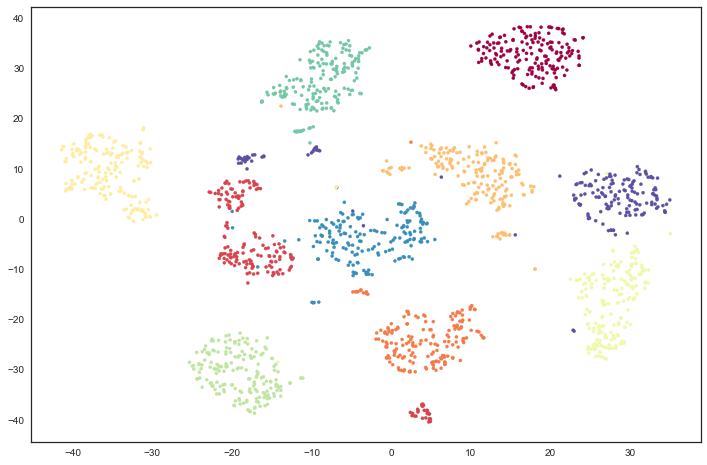

In [14]:
plt.scatter(u_fitsne[:,0], u_fitsne[:,1], c=labels, cmap="Spectral", s=10)

In [15]:
np.save('fitsne_pendigits_embedding1.npy', u_fitsne)

In [16]:
output = pd.DataFrame(u_fitsne, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_pendigits_fitsne1.csv')

## LargeVis

In [17]:
largevis_data = data.astype(np.float32, order='C')
LargeVis.loadarray(largevis_data)
largevis_n_samples = int(largevis_data.shape[0] / 100.0)

In [18]:
%time u_largevis = LargeVis.run(2, 1, largevis_n_samples)

CPU times: user 20.1 s, sys: 294 ms, total: 20.4 s
Wall time: 20.4 s


In [19]:
u_largevis = np.array(u_largevis)

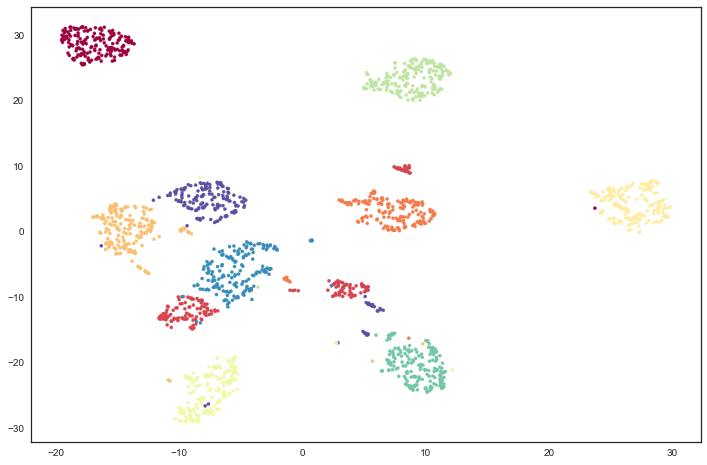

In [20]:
plt.scatter(u_largevis[:,0], u_largevis[:,1], c=labels, cmap="Spectral", s=10)

In [21]:
np.save('largevis_pendigits_embedding1.npy', u_largevis)

In [22]:
output = pd.DataFrame(u_largevis, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_pendigits_largevis1.csv')

## Isomap

In [23]:
%%time
u_isomap = Isomap().fit_transform(data)

CPU times: user 1.58 s, sys: 88.5 ms, total: 1.67 s
Wall time: 1.51 s


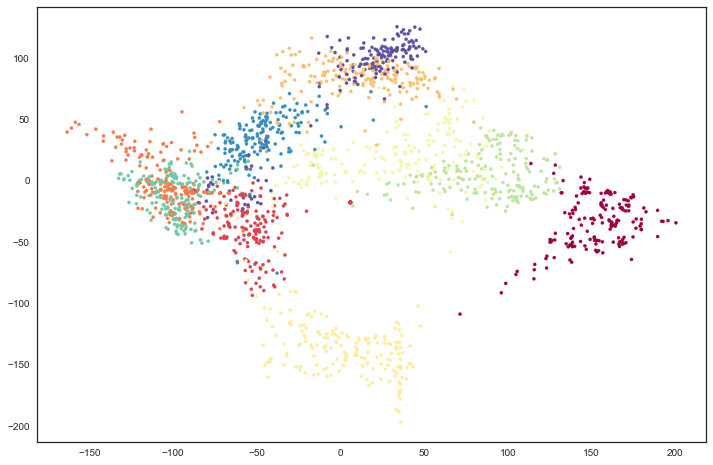

In [24]:
plt.scatter(u_isomap[:,0], u_isomap[:,1], c=labels, cmap="Spectral", s=10)

# Laplacian Eigenmaps

In [25]:
%%time
u_laplacian = SpectralEmbedding().fit_transform(data)

CPU times: user 2.32 s, sys: 101 ms, total: 2.42 s
Wall time: 1.57 s


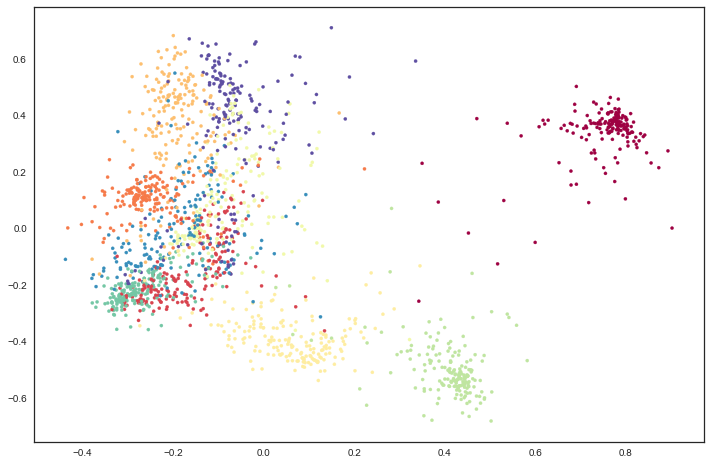

In [26]:
plt.scatter(u_laplacian[:,0], u_laplacian[:,1], c=labels, cmap="Spectral", s=10)

## MDS

In [27]:
%%time
u_mds = MDS().fit_transform(data)

CPU times: user 3min 19s, sys: 31.3 s, total: 3min 50s
Wall time: 2min 22s


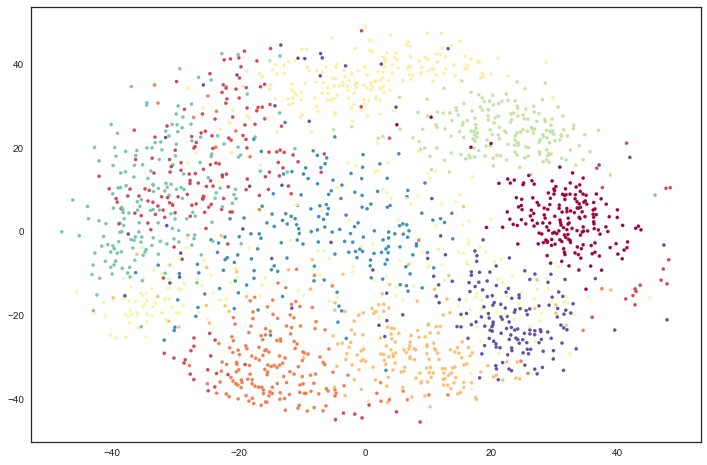

In [28]:
plt.scatter(u_mds[:,0], u_mds[:,1], c=labels, cmap="Spectral", s=10)